# The cost of education in 2025-2035 in secondary school and gymnasium

The purpose of this project is to forecast the cost of education in 2025-2035 in secondary school and gymnasium by region.

In [1]:
import requests
import json
import csv
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler


# 1. Load data

Levande födda efter region och år. År 1968 - 2023 (https://www.statistikdatabasen.scb.se/pxweb/sv/ssd/START__BE__BE0101__BE0101H/FoddaK/)

In [2]:
# API URL
url = "https://api.scb.se/OV0104/v1/doris/sv/ssd/START/BE/BE0101/BE0101H/FoddaK"

In [3]:
# JSON-förfrågan
payload = {
    "query": [
        {
            "code": "Region",
            "selection": {
                "filter": "vs:RegionLän07",
                "values": [
                    "01", "03", "04", "05", "06", "07", "08", "09", "10", "12",
                    "13", "14", "17", "18", "19", "20", "21", "22", "23", "24", "25"
                ]
            }
        }
    ],
    "response": {
        "format": "json"
    }
}

In [4]:
# Skicka POST-förfrågan till SCB API
response = requests.post(url, json=payload)

In [5]:
# Kontrollera om förfrågan lyckades
if response.status_code == 200:
    data = response.json()
    
    # Skapa och spara data i CSV-format
    with open('region_birth_data.csv', mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        # Skriv rubrikerna i CSV-filen
        writer.writerow(['Region', 'Year', 'Number'])

        # Loopa genom data och skriv till CSV
        for item in data['data']:
            region = item['key'][0]
            year = item['key'][1]
            number = item['values'][0]
            writer.writerow([region, year, number])

    print("Data har sparats till region_birth_data.csv")
else:
    print(f"Fel vid hämtning av data: {response.status_code}")

Data har sparats till region_birth_data.csv


Folkmängd 0-16 år efter region, ålder och år (https://www.statistikdatabasen.scb.se/pxweb/sv/ssd/START__BE__BE0101__BE0101A/BefolkningNy/table/tableViewLayout1/)

In [6]:
url = "https://api.scb.se/OV0104/v1/doris/sv/ssd/START/BE/BE0101/BE0101A/BefolkningNy"

In [7]:
query = {
    "query": [
        {
            "code": "Region",
            "selection": {
                "filter": "vs:RegionLän07",
                "values": [
                    "01", "03", "04", "05", "06", "07", "08", "09", "10",
                    "12", "13", "14", "17", "18", "19", "20", "21", "22", "23",
                    "24", "25"
                ]
            }
        },
        {
            "code": "Alder",
            "selection": {
                "filter": "vs:Ålder1årA",
                "values": [
                    "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11",
                    "12", "13", "14", "15", "16"
                ]
            }
        },
        {
            "code": "ContentsCode",
            "selection": {
                "filter": "item",
                "values": ["BE0101N1"]
            }
        }
    ],
    "response": {
        "format": "json"
    }
}


In [8]:
# Skicka POST-förfrågan
response = requests.post(url, json=query)


In [9]:
if response.status_code == 200:
    data = response.json()
    
    # Spara data i CSV-format
    with open('scb_population_0_16_years.csv', mode='w', newline='', encoding='utf-8') as csv_file:
        csv_writer = csv.writer(csv_file)
        
        # Skriv rubriker
        headers = ['Region', 'Age', 'Year', 'Population']
        csv_writer.writerow(headers)
        
        # Skriv rader
        for item in data['data']:
            region = item['key'][0]
            alder = item['key'][1]
            year = item['key'][2]
            population = item['values'][0]
            csv_writer.writerow([region, alder, year, population])

    print("Data har sparats i scb_population_0_16_years.csv")
else:
    print(f"Fel vid hämtning av data: {response.status_code}")

Data har sparats i scb_population_0_16_years.csv


Folkmängd 17-19 år efter region, ålder och år (https://www.statistikdatabasen.scb.se/pxweb/sv/ssd/START__BE__BE0101__BE0101A/BefolkningNy/table/tableViewLayout1/)

In [10]:
url = "https://api.scb.se/OV0104/v1/doris/sv/ssd/START/BE/BE0101/BE0101A/BefolkningNy"

In [11]:
query = {
    "query": [
        {
            "code": "Region",
            "selection": {
                "filter": "vs:RegionLän07",
                "values": [
                    "01", "03", "04", "05", "06", "07", "08", "09", "10",
                    "12", "13", "14", "17", "18", "19", "20", "21", "22", "23",
                    "24", "25"
                ]
            }
        },
        {
            "code": "Alder",
            "selection": {
                "filter": "vs:Ålder1årA",
                "values": [
                     "17", "18", "19"
                ]
            }
        },
        {
            "code": "ContentsCode",
            "selection": {
                "filter": "item",
                "values": ["BE0101N1"]
            }
        }
    ],
    "response": {
        "format": "json"
    }
}


In [12]:
# Skicka POST-förfrågan
response = requests.post(url, json=query)


In [13]:
if response.status_code == 200:
    data = response.json()
    
    # Spara data i CSV-format
    with open('scb_population_17_19_years.csv', mode='w', newline='', encoding='utf-8') as csv_file:
        csv_writer = csv.writer(csv_file)
        
        # Skriv rubriker
        headers = ['Region', 'Age', 'Year', 'Population']
        csv_writer.writerow(headers)
        
        # Skriv rader
        for item in data['data']:
            region = item['key'][0]
            alder = item['key'][1]
            year = item['key'][2]
            population = item['values'][0]
            csv_writer.writerow([region, alder, year, population])

    print("Data har sparats i scb_population_17_19_years.csv")
else:
    print(f"Fel vid hämtning av data: {response.status_code}")

Data har sparats i scb_population_17_19_years.csv


Döda efter region, ålder och år (https://www.statistikdatabasen.scb.se/pxweb/sv/ssd/START__BE__BE0101__BE0101I/DodaFodelsearK/table/tableViewLayout1/) 

In [14]:
url = "https://api.scb.se/OV0104/v1/doris/sv/ssd/START/BE/BE0101/BE0101I/DodaFodelsearK"

In [15]:
# JSON-förfrågan
payload = {
    "query": [
        {
            "code": "Region",
            "selection": {
                "filter": "vs:RegionLän07",
                "values": [
                    "01", "03", "04", "05", "06", "07", "08", "09", "10", "12",
                    "13", "14", "17", "18", "19", "20", "21", "22", "23", "24", "25"
                ]
            }
        },
        {
            "code": "Alder",
            "selection": {
                "filter": "vs:Ålder1årA",
                "values": [str(i) for i in range(20)]  # Ålder 0-19
            }
        },
        {
            "code": "Tid",
            "selection": {
                "filter": "item",
                "values": [str(year) for year in range(2000, 2023)]  # År 2000-2023
            }
        }
    ],
    "response": {
        "format": "json"
    }
}

In [16]:
# Skicka POST-förfrågan till SCB API
response = requests.post(url, json=payload)

In [17]:
# Kontrollera om förfrågan lyckades
if response.status_code == 200:
    data = response.json()
    
    # Skapa och spara data i CSV-format
    with open('scb_dead_region.csv', mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        # Skriv rubrikerna i CSV-filen
        writer.writerow(['Region', 'Age', 'Year', 'Number'])

        # Loopa genom data och skriv till CSV
        for item in data['data']:
            region = item['key'][0]
            age = item['key'][1]
            year = item['key'][2]
            number = item['values'][0]
            writer.writerow([region, age, year, number])

    print("Data har sparats till scb_dead_region.csv")
else:
    print(f"Fel vid hämtning av data: {response.status_code}")

Data har sparats till scb_dead_region.csv


Flyttningsöverskott efter region, ålder och år (https://www.statistikdatabasen.scb.se/pxweb/sv/ssd/START__BE__BE0101__BE0101J/Flyttningar97/table/tableViewLayout1/)

In [18]:
# URL till SCB API för migration
url = "https://api.scb.se/OV0104/v1/doris/sv/ssd/START/BE/BE0101/BE0101J/Flyttningar97"


In [19]:
# Payload enligt din specifikation
payload = {
    "query": [
        {
            "code": "Region",
            "selection": {
                "filter": "vs:RegionLän99EjAggr",
                "values": [
                    "01", "03", "04", "05", "06", "07", "08", "09", "10", "12", "13", "14",
                    "17", "18", "19", "20", "21", "22", "23", "24", "25"
                ]
            }
        },
        {
            "code": "Alder",
            "selection": {
                "filter": "vs:Ålder1årA",
                "values": [str(i) for i in range(20)]  # åldrar 0 till 19
            }
        },
        {
            "code": "ContentsCode",
            "selection": {
                "filter": "item",
                "values": ["BE0101AZ"]  # migrationsdata
            }
        },
        {
            "code": "Tid",
            "selection": {
                "filter": "item",
                "values": [str(i) for i in range(2000, 2024)]  # åren 2000 till 2023
            }
        }
    ],
    "response": {
        "format": "json"  # Ändra till JSON format för enkel hantering
    }
}


In [20]:
# Skicka förfrågan till API:et
headers = {'Content-Type': 'application/json'}
response = requests.post(url, headers=headers, data=json.dumps(payload))

In [21]:
# Kontrollera om förfrågan lyckades
if response.status_code == 200:
    data = response.json()
    
    # Omvandla API-svaret till DataFrame
    rows = []
    for item in data['data']:
        row = {
            "Region": item['key'][0],
            "Age": item['key'][1],
            "Year": item['key'][2],
            "Number": item['values'][0]
        }
        rows.append(row)
    
    # Skapa DataFrame och spara som CSV
    df = pd.DataFrame(rows)
    df.to_csv('scb_migration_data.csv', index=False, encoding='utf-8-sig')
    print("Data sparades till 'scb_migration_data.csv'.")
else:
    print(f"Fel: {response.status_code}, Detaljer: {response.text}")

Data sparades till 'scb_migration_data.csv'.


# 2. Data transformation. Database generators

1. Consolidation of population data

In [22]:
# Loud data
population_0_16 = pd.read_csv('scb_population_0_16_years.csv')
population_17_19 = pd.read_csv('scb_population_17_19_years.csv')


In [23]:
# Merge tables vertically
combined_population = pd.concat([population_0_16, population_17_19], ignore_index=True)

In [24]:
# Checking the result
print(combined_population.head())

   Region  Age  Year  Population
0       1    0  1968       19736
1       1    0  1969       19351
2       1    0  1970       20840
3       1    0  1971       22142
4       1    0  1972       22099


In [25]:
# Save the merged table to a new CSV file
combined_population.to_csv('combined_population_0_19_years.csv', index=False)

print(combined_population.head())

   Region  Age  Year  Population
0       1    0  1968       19736
1       1    0  1969       19351
2       1    0  1970       20840
3       1    0  1971       22142
4       1    0  1972       22099


2.Calculation of the mortality rate

In [26]:
# Loading data from CSV files
population_df = pd.read_csv('combined_population_0_19_years.csv')
deaths_df = pd.read_csv('scb_dead_region.csv')


In [27]:
# Filter data by year (2000-2023)
filtered_population = population_df[(population_df['Year'] >= 2000) & (population_df['Year'] <= 2023)]


In [28]:
# Grouping data by age and summing up the population (regardless of region and year)
population_by_age = filtered_population.groupby('Age')['Population'].sum().reset_index()

In [29]:
# Filtering and grouping data by age and summing up the number of deaths (2000-2023)
deaths_by_age = deaths_df[(deaths_df['Year'] >= 2000) & (deaths_df['Year'] <= 2023)].groupby('Age')['Number'].sum().reset_index()

In [30]:
# Merge tables by age
merged_df = pd.merge(population_by_age, deaths_by_age, left_on='Age', right_on='Age', how='inner')

In [31]:
# Calculating the mortality rate
merged_df['Mortality_Rate'] = (merged_df['Number'] / merged_df['Population']) * 100

In [32]:
# Only the necessary columns Age and Mortality_Rate
mortality_rate_df = merged_df[['Age', 'Mortality_Rate']]

In [33]:
# Save table to new CSV file
mortality_rate_df.to_csv('mortality_rate.csv', index=False)


In [34]:
print(mortality_rate_df)

    Age  Mortality_Rate
0     0        0.212834
1     1        0.043071
2     2        0.015785
3     3        0.011063
4     4        0.009583
5     5        0.008885
6     6        0.007945
7     7        0.006961
8     8        0.006620
9     9        0.006604
10   10        0.006516
11   11        0.007322
12   12        0.007257
13   13        0.009609
14   14        0.010670
15   15        0.015036
16   16        0.016584
17   17        0.022521
18   18        0.027203
19   19        0.035517


3.Calculation of the migration rate

In [35]:
# Reading population and migration data
population_df = pd.read_csv('combined_population_0_19_years.csv')
migration_df = pd.read_csv('scb_migration_data.csv')

In [36]:
# Filtering population data since 2000 to compare with migration
population_df_filtered = population_df[population_df['Year'] >= 2000]

In [37]:
# List for saving migration coefficients
migration_rate_list = []


In [38]:
# Calculation of migration rates
for region in migration_df['Region'].unique():
    for age in migration_df['Age'].unique():
        migration_rates = []
        for year in migration_df[migration_df['Year'] >= 2000]['Year'].unique():
            # We receive population data for the current and previous years
            previous_year_population = population_df_filtered[(population_df_filtered['Region'] == region) & 
                                                              (population_df_filtered['Age'] == age) & 
                                                              (population_df_filtered['Year'] == year - 1)]
            migration_data = migration_df[(migration_df['Region'] == region) & 
                                          (migration_df['Age'] == age) & 
                                          (migration_df['Year'] == year)]
            
            if not previous_year_population.empty and not migration_data.empty:
                population = previous_year_population['Population'].values[0]
                migration = migration_data['Number'].values[0]
                
                # Calculate the migration rate
                migration_rate = (migration / population) * 100
                migration_rates.append(migration_rate)
        
        # If the migration coefficients have been calculated, we calculate their average value
        if migration_rates:
            avg_migration_rate = sum(migration_rates) / len(migration_rates)
            migration_rate_list.append([region, age, avg_migration_rate])



In [39]:
# Check the length of the list strings to avoid error
for row in migration_rate_list:
    assert len(row) == 3, f"Error: The row {row} contains {len(row)} elements instead of 3."



In [40]:
# Convert List to DataFrame
migration_rate_df = pd.DataFrame(migration_rate_list, columns=['Region', 'Age', 'Average_Migration_Rate'])



In [41]:
# Saving table to CSV file
migration_rate_df.to_csv('migration_rate.csv', index=False)

# 3. Create SQL database

In [42]:
# Creating connections to the SQLite database
conn = sqlite3.connect('education_costs_db.sqlite')
cursor = conn.cursor()

In [43]:
# Load data from CSV file
combined_population_df = pd.read_csv('combined_population_0_19_years.csv')
mortality_rate_df = pd.read_csv('mortality_rate.csv')
birth_data_df = pd.read_csv('region_birth_data.csv')
migration_rate_df=pd.read_csv('migration_rate.csv')
grundskola_costs_df=pd.read_csv('grundskola_costs_per_child.csv')
gymnasieskola_costs_df=pd.read_csv('gymnasieskola_costs_per_child.csv')
region_df = pd.read_csv('region.csv', encoding='ISO-8859-1')

In [44]:
# Saving CSV files to SQL database
combined_population_df.to_sql('combined_population_0_19_years', conn, if_exists='replace', index=False) 
mortality_rate_df.to_sql('mortality_rate', conn, if_exists='replace', index=False)
birth_data_df.to_sql('birth_data', conn, if_exists='replace', index=False) 
migration_rate_df.to_sql('migration_rate', conn, if_exists='replace', index=False) 
grundskola_costs_df.to_sql('grundskola_costs', conn, if_exists='replace', index=False) 
gymnasieskola_costs_df.to_sql('gymnasieskola_costs', conn, if_exists='replace', index=False)
region_df.to_sql('region', conn, if_exists='replace', index=False)

21

In [45]:
# Check that the tables are created
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Created tables:", tables)


Created tables: [('year_klass',), ('birth_2007_2029',), ('school_gymnasium_results',), ('Cost_region_grundskola_forecast_2025_2035',), ('Cost_region_gymnasieskola_forecast_2025_2035',), ('grundskola_costs_forecast',), ('gymnasieskola_costs_forecast',), ('predictions_birth_2024_2029',), ('combined_population_0_19_years',), ('mortality_rate',), ('birth_data',), ('migration_rate',), ('grundskola_costs',), ('gymnasieskola_costs',), ('region',)]


In [46]:
# Check the contents of each table
for table in tables:
    table_name = table[0]
    print(f"\nTable {table_name}:")
    
    # Execute SQL query to get first 5 rows from each table
    data = pd.read_sql_query(f"SELECT * FROM {table_name} LIMIT 5;", conn)
    print(data)


Table year_klass:
   year  F_school  1_school  2_school  3_school  4_school  5_school  6_school  \
0  2025      2019      2018      2017      2016      2015      2014      2013   
1  2026      2020      2019      2018      2017      2016      2015      2014   
2  2027      2021      2020      2019      2018      2017      2016      2015   
3  2028      2022      2021      2020      2019      2018      2017      2016   
4  2029      2023      2022      2021      2020      2019      2018      2017   

   7_school  8_school  9_school  1_gymnasium  2_gymnasium  3__gymnasium  
0      2012      2011      2010         2009         2008          2007  
1      2013      2012      2011         2010         2009          2008  
2      2014      2013      2012         2011         2010          2009  
3      2015      2014      2013         2012         2011          2010  
4      2016      2015      2014         2013         2012          2011  

Table birth_2007_2029:
   Region  Year  Number
0 

In [47]:

conn.close()

# 4. Verifying the correctness of migration and mortality rates

Algorithm:
Extract data for children in 2004 from the birth_data table.
Apply migration and death rates for each year in sequence.
Compare with the number of 19-year-olds in 2023.

In [56]:
# Connections to SQLite database
conn = sqlite3.connect('education_costs_db.sqlite')

In [57]:
# Loading data
combined_population_df = pd.read_csv('combined_population_0_19_years.csv')
mortality_rate_df = pd.read_csv('mortality_rate.csv')
birth_data_df = pd.read_csv('region_birth_data.csv')
migration_rate_df = pd.read_csv('migration_rate.csv')

In [63]:
# Parameters
region_id = 14
start_year = 2004
max_age = 20  # Возраст от 0 до 19 лет

In [64]:
# Preparing for data storage
results = []


In [65]:
# Initial values
adjusted_population = None  # Initially empty for starting year

In [66]:
# Age selection from 0 to 19 years
for age in range(max_age):
    year = start_year + age
    
    # 1. We get the number of people born in 2004
    if year == start_year:
        initial_number = birth_data_df.loc[(birth_data_df['Year'] == year) & (birth_data_df['Region'] == region_id), 'Number'].values[0]
        adjusted_population = initial_number  # Keep the initial number of births
    else:
        # Use the previous adjusted_population value
        initial_number = adjusted_population

    # 2. Obtain coefficients from tables
    # Mortality
    mortality_rate = mortality_rate_df.loc[mortality_rate_df['Age'] == age, 'Mortality_Rate'].values[0] / 100  

    # Apply the mortality rate
    population_after_mortality = adjusted_population * (1 - mortality_rate)

    # Migration
    migration_rate = migration_rate_df.loc[(migration_rate_df['Region'] == region_id) & (migration_rate_df['Age'] == age), 'Average_Migration_Rate'].values[0] / 100  # Делим на 100

    # Apply the migration coefficient
    population_after_migration = population_after_mortality * (1 + migration_rate)

    # Update adjusted_population for next year
    adjusted_population = round(population_after_migration)

    # 3. Get the real number of people from the combined_population_0_19_years.csv
    real_population = combined_population_df.loc[(combined_population_df['Year'] == year) & 
                                                 (combined_population_df['Region'] == region_id) & 
                                                 (combined_population_df['Age'] == age), 
                                                 'Population'].values[0]

   # 4. Calculate the difference
    difference = real_population - adjusted_population
    percentage_difference = (difference / real_population) * 100 if real_population != 0 else 0

   # Save the results
    results.append({
        'Year': year,
        'Age': age,
        'Initial_Number': initial_number,
        'Mortality_Rate': mortality_rate * 100,  # Return to percentages for the report
        'Population_After_Mortality': round(population_after_mortality),
        'Average_Migration_Rate': migration_rate * 100,  # Return to percentages for the report
        'Population_After_Migration': round(population_after_migration),
        'Adjusted_Population': adjusted_population,  # Use the new value for adjusted_population
        'Real_Population': real_population,
        'Difference': round(difference),
        'Percentage_Difference': round(percentage_difference, 2)
    })



In [67]:
# Convert the results to a DataFrame for easy display
results_df = pd.DataFrame(results)
print(results_df)


    Year  Age  Initial_Number  Mortality_Rate  Population_After_Mortality  \
0   2004    0           17086        0.212834                       17050   
1   2005    1           17105        0.043071                       17098   
2   2006    2           17210        0.015785                       17207   
3   2007    3           17292        0.011063                       17290   
4   2008    4           17371        0.009583                       17369   
5   2009    5           17449        0.008885                       17447   
6   2010    6           17526        0.007945                       17525   
7   2011    7           17608        0.006961                       17607   
8   2012    8           17695        0.006620                       17694   
9   2013    9           17793        0.006604                       17792   
10  2014   10           17900        0.006516                       17899   
11  2015   11           18013        0.007322                       18012   

In [68]:
# Closing the connection
conn.close()

# 5. Modell

# LSTM 

https://keras.io/api/layers/recurrent_layers/lstm/

In [410]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

In [411]:
# Connect to the database
conn = sqlite3.connect('education_costs_db.sqlite')

In [412]:
# Loading birth data
data = pd.read_sql_query("SELECT * FROM birth_data", conn)
data['Year'] = pd.to_datetime(data['Year'], format='%Y').dt.year
data = data.sort_values(by=['Region', 'Year'])

In [413]:
# Data preparation
data_pivot = data.pivot(index='Year', columns='Region', values='Number')
data_pivot = data_pivot.fillna(0)

In [414]:
# Normalize the data
scaler = MinMaxScaler()

In [415]:
# Define 'numbers' as data from 'data_pivot' (all values to be scaled)
numbers = data_pivot.values  


In [416]:
# Transform the data
numbers_scaled = scaler.fit_transform(numbers)

In [417]:
# Use normalized data to train the model
# Prepare input data for LSTM
X = []
y = []
time_step = 5

In [418]:
for i in range(len(numbers_scaled) - time_step):
    X.append(numbers_scaled[i:i + time_step])
    y.append(numbers_scaled[i + time_step])

X = np.array(X)
y = np.array(y)

In [419]:
# Reshape X for LSTM
X = X.reshape((X.shape[0], X.shape[1], X.shape[2]))

In [420]:
# Splitting into training and testing data
train_size = len(X) - 5
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [421]:
# Creating a model
model = Sequential()
model.add(LSTM(150, activation='relu', return_sequences=True, input_shape=(time_step, X.shape[2])))
model.add(Dropout(0.2))
model.add(BatchNormalization())
#model.add(LSTM(150, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(X.shape[2]))  # Один выход для каждого региона

model.compile(optimizer='adam', loss='mse')

C:\Users\lidii\anaconda3\envs\pystad\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [422]:
# Model training
model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=0)


In [423]:
# Forecasting on test data
test_predictions = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


In [424]:
# Convert predictions back to original scale
test_predictions_original_scale = scaler.inverse_transform(test_predictions)


In [425]:
# Convert test data and predictions to DataFrame
test_predictions_df = pd.DataFrame(test_predictions_original_scale, columns=data_pivot.columns, 
                                   index=[data_pivot.index[-5], data_pivot.index[-4], data_pivot.index[-3], data_pivot.index[-2], data_pivot.index[-1]])


In [426]:
# Convert real test values back to original scale
y_test_original_scale = scaler.inverse_transform(y_test)


In [427]:
# Converting real values to DataFrame
real_values_df = pd.DataFrame(y_test_original_scale, columns=data_pivot.columns, 
                              index=[data_pivot.index[-5], data_pivot.index[-4], data_pivot.index[-3], data_pivot.index[-2], data_pivot.index[-1]])

In [428]:
# Calculating the percentage error
percentage_error_df = abs((real_values_df - test_predictions_df) / real_values_df) * 100


In [429]:
# Forecast for the next 6 years (including 2029)029)
last_sequence = numbers_scaled[-time_step:]  # Latest data for forecasting
last_sequence = last_sequence.reshape(1, time_step, last_sequence.shape[1])

future_predictions = []



In [430]:
for _ in range(6):  # Forecast for 6 years (2024-2029)
    predicted = model.predict(last_sequence)
    future_predictions.append(predicted[0])
    
    # Update the sequence for the next forecast
    last_sequence = np.append(last_sequence[:, 1:, :], predicted.reshape(1, 1, predicted.shape[1]), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [431]:
# Transform future predictions back to their original scale
future_predictions_original_scale = scaler.inverse_transform(future_predictions)


In [432]:
# Converting Future Predictions to DataFrame
future_predictions_df = pd.DataFrame(future_predictions_original_scale, columns=data_pivot.columns, 
                                     index=[2024, 2025, 2026, 2027, 2028, 2029])

In [433]:
# Output results
print("Test results for the last 6 years (predicted values):")
print(test_predictions_df)

print("\nReal values for the last 6 years:")
print(real_values_df)

print("\nPercentage error for each region and year:")
print(percentage_error_df)

print("\nPredictions for the next 6 years (2024-2029):")
print(future_predictions_df)

Test results for the last 6 years (predicted values):
Region            1            3            4            5            6   \
2019    23730.845703  3542.206787  2758.686768  4579.463867  3688.613281   
2020    23660.810547  3534.205322  2751.760010  4572.519531  3687.912354   
2021    23729.388672  3539.025879  2749.657959  4567.138184  3689.096680   
2022    23860.238281  3541.552490  2747.352783  4561.353516  3685.797363   
2023    23861.876953  3532.315430  2728.186523  4536.348145  3668.878174   

Region           7            8           9            10            12  ...  \
2019    1906.303955  2318.900879  509.991028  1508.603516  13346.049805  ...   
2020    1902.386719  2318.232178  510.265686  1505.887695  13295.598633  ...   
2021    1904.106079  2311.274170  509.354553  1503.771240  13334.669922  ...   
2022    1900.340942  2297.939453  507.501190  1495.467529  13371.130859  ...   
2023    1888.984253  2265.323242  503.310455  1485.550415  13368.445312  ...   

Region  

In [434]:
# Calculate the average value for each year
average_percentage_error_per_year = percentage_error_df.mean(axis=1)


In [435]:
# Round the result to two decimal places
average_percentage_error_per_year = average_percentage_error_per_year.round(2)

In [437]:
# Output the result
print("\nAverage percentage error for each year:")
print(average_percentage_error_per_year)


Average percentage error for each year:
2019    8.85
2020    8.19
2021    7.55
2022    6.23
2023    8.45
dtype: float64


In [438]:
# Add a new DataFrame to store the results in the required format
# To do this, transform our DataFrame with forecasts future_predictions_df
future_predictions_melted = future_predictions_df.reset_index().melt(id_vars='index', var_name='Region', value_name='Number')


In [439]:
# Rename the columns to match the format
future_predictions_melted.rename(columns={'index': 'Year'}, inplace=True)

In [440]:
# Make sure 'Region' is in numeric format
future_predictions_melted['Region'] = future_predictions_melted['Region'].astype(int) 

In [441]:
# Round values in column 'Number' to whole number
future_predictions_melted['Number'] = future_predictions_melted['Number'].round().astype(int)


In [442]:
# Add sorting by region and year
future_predictions_melted = future_predictions_melted.sort_values(by=['Region', 'Year'])

In [443]:
# Save to CSV
csv_file_path = 'predictions_birth_2024_2029.csv'
future_predictions_melted.to_csv(csv_file_path, index=False)

In [444]:

print(f"\nPredictions are saved to file: {csv_file_path}")


Predictions are saved to file: predictions_birth_2024_2029.csv


In [445]:
# Save the DataFrame to the table predictions_birth_2024_2029
predictions_df = pd.read_csv(csv_file_path)
predictions_df.to_sql('predictions_birth_2024_2029', conn, if_exists='replace', index=False)

126

In [446]:

conn.close()

# 6. Forecasting the number of children in school by year

6.1.Data preparation

6.1.1.Comparison of year of birth and year of study

In [447]:
# # Loading a CSV file into a DataFrame
df = pd.read_csv('year_klass.csv')

In [448]:
print(df.head(60))

    year  F_school  1_school  2_school  3_school  4_school  5_school  \
0   2025      2019      2018      2017      2016      2015      2014   
1   2026      2020      2019      2018      2017      2016      2015   
2   2027      2021      2020      2019      2018      2017      2016   
3   2028      2022      2021      2020      2019      2018      2017   
4   2029      2023      2022      2021      2020      2019      2018   
5   2030      2024      2023      2022      2021      2020      2019   
6   2031      2025      2024      2023      2022      2021      2020   
7   2032      2026      2025      2024      2023      2022      2021   
8   2033      2027      2026      2025      2024      2023      2022   
9   2034      2028      2027      2026      2025      2024      2023   
10  2035      2029      2028      2027      2026      2025      2024   

    6_school  7_school  8_school  9_school  1_gymnasium  2_gymnasium  \
0       2013      2012      2011      2010         2009        

In [449]:
# Connect to the database
conn = sqlite3.connect('education_costs_db.sqlite')

In [450]:
# Replace 'your_table_name' with your desired table name
df.to_sql('year_klass', conn, if_exists='replace', index=False)

11

In [451]:
# Close the connection
conn.close()

6.1.2.Creating a table with the number of births from 2007 to 2029

In [452]:
# Connect to the database
conn = sqlite3.connect('education_costs_db.sqlite')


In [453]:
# Extract data from birth_data for years 2007-2023
birth_data_query = """
SELECT Region, Year, Number
FROM birth_data
WHERE Year BETWEEN 2007 AND 2023;
"""
birth_data = pd.read_sql_query(birth_data_query, conn)

In [454]:
#Extract data from predictions_birth_2024_2029
predictions_birth_query = """
SELECT Year, Region, Number
FROM predictions_birth_2024_2029;
"""
predictions_birth = pd.read_sql_query(predictions_birth_query, conn)

In [455]:
#Merging a set of data into one ta
birth_2007_2029 = pd.concat([birth_data, predictions_birth], ignore_index=True)

In [456]:
# Sorting the table by year for clarity
birth_2007_2029 = birth_2007_2029.sort_values(by=['Region', 'Year']).reset_index(drop=True)

In [457]:
# Store the result in a new table birth_2007_2029 in the database
birth_2007_2029.to_sql('birth_2007_2029', conn, if_exists='replace', index=False)

483

In [458]:

conn.close()

6.2.Calculation

In [459]:
# Create a database conne
conn = sqlite3.connect('education_costs_db.sqlite')

In [460]:
# List of regions to process
regions = [1, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 17, 18, 19, 20, 21, 22, 23, 24, 25]

In [461]:
# List of classes to process
classes = ['F_school', '1_school', '2_school', '3_school', '4_school', '5_school', 
           '6_school', '7_school', '8_school', '9_school', '1_gymnasium', 
           '2_gymnasium', '3__gymnasium']

In [462]:
# Create an empty DataFrame to store all results
all_results = pd.DataFrame()

In [463]:
# To go through each region
for region in regions:
    # Load tables for the current region
    year_klass = pd.read_sql_query("SELECT * FROM year_klass", conn)
    birth_data = pd.read_sql_query(f"SELECT * FROM birth_2007_2029 WHERE Region = {region}", conn)
    mortality_rate = pd.read_sql_query("SELECT * FROM mortality_rate", conn)
    migration_rate = pd.read_sql_query(f"SELECT * FROM migration_rate WHERE Region = {region}", conn)
    
    # Convert tables with coefficients into dictionaries
    mortality_rate_dict = mortality_rate.set_index('Age')['Mortality_Rate'].to_dict()
    migration_rate_dict = migration_rate.set_index('Age')['Average_Migration_Rate'].to_dict()

    # Function for calculating the number of children taking into account mortality and migration
    def calculate_children(birth_year, school_year):
        age = school_year - birth_year  # Calculate the age of the child
        if age < 0:
            return 0
        
        # To get the number of children born for a given year
        birth_row = birth_data.loc[birth_data['Year'] == birth_year, 'Number']
        if birth_row.empty:
            return 0  # If there is no data on births, return 0
        
        birth_count = birth_row.values[0]  # Number of births per year
        
        # To apply mortality and migration rates for each year of life
        for year in range(age):
            mortality_rate = mortality_rate_dict.get(year, 0) / 100  
            migration_rate = migration_rate_dict.get(year, 0) / 100  
            
           # Apply coefficients to the current number of children
            birth_count = birth_count * (1 - mortality_rate) * (1 + migration_rate)
        
        return round(birth_count)  
    
   # Create a copy of the year_klass table for work
    result_table = year_klass.copy()
    
    # Fill the table for the current region
    for index, row in year_klass.iterrows():
        school_year = row['year']
        
        # To go through all classes
        for class_name in classes:
            birth_year = row[class_name]
            if pd.notna(birth_year):  # Check that the year of birth is not empty
                birth_year = int(birth_year)
                # To calculate the number of children taking into account mortality and migration
                result_table.at[index, class_name] = calculate_children(birth_year, school_year)
    
    # Add the Region column
    result_table['Region'] = region

    # Add the result of the current region to the overall DataFrame
    all_results = pd.concat([all_results, result_table], ignore_index=True)

In [464]:
print( all_results)

     year  F_school  1_school  2_school  3_school  4_school  5_school  \
0    2025     28232     28534     28677     29375     29386     29603   
1    2026     28289     28238     28579     28725     29462     29487   
2    2027     28886     28295     28283     28626     28810     29564   
3    2028     26192     28892     28340     28330     28711     28909   
4    2029     25621     26198     28938     28387     28414     28810   
..    ...       ...       ...       ...       ...       ...       ...   
226  2031      2384      2417      2138      2226      2585      2469   
227  2032      2369      2395      2425      2148      2237      2592   
228  2033      2389      2380      2402      2435      2158      2243   
229  2034      2408      2400      2388      2413      2447      2164   
230  2035      2429      2419      2408      2399      2425      2453   

     6_school  7_school  8_school  9_school  1_gymnasium  2_gymnasium  \
0       29845     29298     29176     30359       

In [465]:
# Save the results to a CSV file
all_results.to_csv('school_gymnasium_results_by_region.csv', index=False)


In [466]:
# Save the results to an Excel file
all_results.to_excel('school_gymnasium_results_by_region.xlsx', index=False)

In [467]:
# Save the results to a table in the SQLite database
all_results.to_sql('school_gymnasium_results', conn, if_exists='replace', index=False)

231

In [468]:

conn.close()

# 7. Linear Regression Models for Predicting Annual Tuition Per Student

In [469]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [470]:
# Connect to the database
conn = sqlite3.connect('education_costs_db.sqlite')

7.1.Grundskola

In [471]:
# Extracting data from a table
query = '''
SELECT Year, Fixed_cost_per_child_kr, Current_cost_per_child_kr 
FROM grundskola_costs
'''
data = pd.read_sql_query(query, conn)

In [472]:
# Preparing data for the model
X = data['Year'].values.reshape(-1, 1)  # Transform year into an independent variable
fixed_costs = data['Fixed_cost_per_child_kr'].values  # Dependent variable - fixed costs
variable_costs = data['Current_cost_per_child_kr'].values  # Dependent variable - variable costs


In [473]:
# Linear Regression for Fixed Costs
model_fixed = LinearRegression()
model_fixed.fit(X, fixed_costs)
fixed_costs_pred_train = model_fixed.predict(X)

In [474]:
# Linear Regression for Variable Costs
model_variable = LinearRegression()
model_variable.fit(X, variable_costs)
variable_costs_pred_train = model_variable.predict(X)

In [475]:
# Accuracy check for fixed costs
r2_fixed = r2_score(fixed_costs, fixed_costs_pred_train)
mse_fixed = mean_squared_error(fixed_costs, fixed_costs_pred_train)
mae_fixed = mean_absolute_error(fixed_costs, fixed_costs_pred_train)

In [476]:
print(f'Fixed Costs Model - R²: {r2_fixed:.4f}, MSE: {mse_fixed:.2f}, MAE: {mae_fixed:.2f}')


Fixed Costs Model - R²: 0.9382, MSE: 7746199.32, MAE: 2051.92


In [477]:
# Accuracy check for current expenses
r2_variable = r2_score(variable_costs, variable_costs_pred_train)
mse_variable = mean_squared_error(variable_costs, variable_costs_pred_train)
mae_variable = mean_absolute_error(variable_costs, variable_costs_pred_train)

In [478]:
print(f'Current Costs Model - R²: {r2_variable:.4f}, MSE: {mse_variable:.2f}, MAE: {mae_variable:.2f}')

Current Costs Model - R²: 0.9873, MSE: 2890985.29, MAE: 1415.15


In [479]:
# Forecasting for future years
future_years = np.arange(2023, 2036).reshape(-1, 1)  
fixed_costs_pred = model_fixed.predict(future_years) 
variable_costs_pred = model_variable.predict(future_years)  


In [480]:
# Generate a DataFrame with forecasts
forecast_df = pd.DataFrame({
    'Year': future_years.flatten(),
    'Predicted_Fixed_Cost_per_child_kr': fixed_costs_pred,
    'Predicted_Current_Cost_per_child_kr': variable_costs_pred
})

In [481]:

print(forecast_df)

    Year  Predicted_Fixed_Cost_per_child_kr  \
0   2023                      138586.700000   
1   2024                      140938.370588   
2   2025                      143290.041176   
3   2026                      145641.711765   
4   2027                      147993.382353   
5   2028                      150345.052941   
6   2029                      152696.723529   
7   2030                      155048.394118   
8   2031                      157400.064706   
9   2032                      159751.735294   
10  2033                      162103.405882   
11  2034                      164455.076471   
12  2035                      166806.747059   

    Predicted_Current_Cost_per_child_kr  
0                         130030.000000  
1                         133283.529412  
2                         136537.058824  
3                         139790.588235  
4                         143044.117647  
5                         146297.647059  
6                         149551.176471  
7    

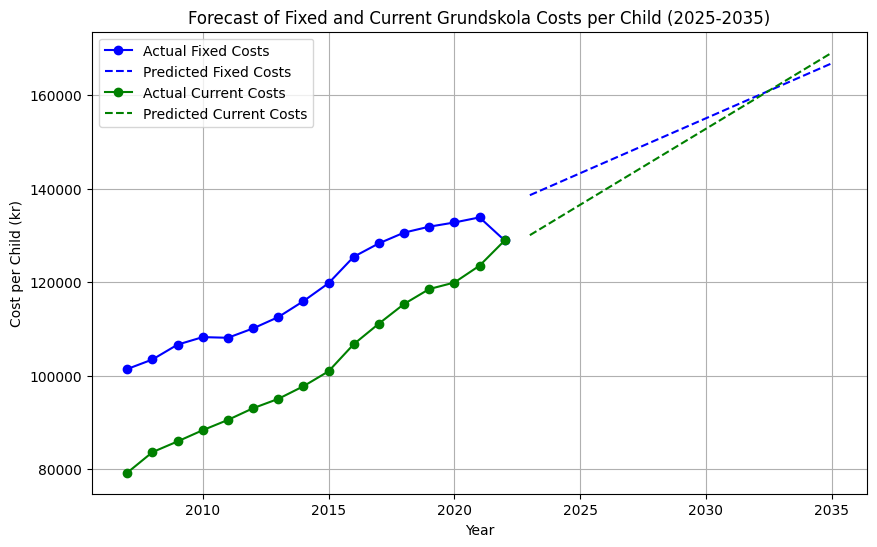

In [482]:
# Visualization of forecasts
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], fixed_costs, label='Actual Fixed Costs', marker='o', color='blue')
plt.plot(future_years, fixed_costs_pred, label='Predicted Fixed Costs', linestyle='--', color='blue')
plt.plot(data['Year'], variable_costs, label='Actual Current Costs', marker='o', color='green')
plt.plot(future_years, variable_costs_pred, label='Predicted Current Costs', linestyle='--', color='green')
plt.xlabel('Year')
plt.ylabel('Cost per Child (kr)')
plt.title('Forecast of Fixed and Current Grundskola Costs per Child (2025-2035)')
plt.legend()
plt.grid(True)
plt.show()


In [483]:
#Rounding to integers
forecast_df['Predicted_Fixed_Cost_per_child_kr'] = forecast_df['Predicted_Fixed_Cost_per_child_kr'].round().astype(int)
forecast_df['Predicted_Current_Cost_per_child_kr'] = forecast_df['Predicted_Current_Cost_per_child_kr'].round().astype(int)


In [484]:
# Saving table to CSV file
csv_file_path = 'grundskola_costs_forecast.csv'
forecast_df.to_csv(csv_file_path, index=False)

In [485]:
# Saving the table to the SQLite database
conn = sqlite3.connect('education_costs_db.sqlite')
forecast_df.to_sql('grundskola_costs_forecast', conn, if_exists='replace', index=False)

13

7.2.Gymnasieskola

In [486]:
# Extracting data from a table
query = '''
SELECT Year, Fixed_cost_per_child_kr, Current_cost_per_child_kr 
FROM gymnasieskola_costs
'''
data = pd.read_sql_query(query, conn)

In [487]:
# Preparing data for the model
X = data['Year'].values.reshape(-1, 1)  
fixed_costs = data['Fixed_cost_per_child_kr'].values  
variable_costs = data['Current_cost_per_child_kr'].values  


In [488]:
# Linear Regression for Fixed Costs
model_fixed = LinearRegression()
model_fixed.fit(X, fixed_costs)
fixed_costs_pred_train = model_fixed.predict(X)

In [489]:
# Linear Regression for Variable Costs
model_variable = LinearRegression()
model_variable.fit(X, variable_costs)
variable_costs_pred_train = model_variable.predict(X)


In [490]:
# Accuracy check for fixed costs
r2_fixed = r2_score(fixed_costs, fixed_costs_pred_train)
mse_fixed = mean_squared_error(fixed_costs, fixed_costs_pred_train)
mae_fixed = mean_absolute_error(fixed_costs, fixed_costs_pred_train)


In [491]:
print(f'Fixed Costs Model - R²: {r2_fixed:.4f}, MSE: {mse_fixed:.2f}, MAE: {mae_fixed:.2f}')

Fixed Costs Model - R²: 0.8010, MSE: 23338254.59, MAE: 4006.67


In [492]:
# Accuracy check for current expenses
r2_variable = r2_score(variable_costs, variable_costs_pred_train)
mse_variable = mean_squared_error(variable_costs, variable_costs_pred_train)
mae_variable = mean_absolute_error(variable_costs, variable_costs_pred_train)

In [493]:
print(f'Current Costs Model - R²: {r2_variable:.4f}, MSE: {mse_variable:.2f}, MAE: {mae_variable:.2f}')

Current Costs Model - R²: 0.9796, MSE: 4342858.46, MAE: 1736.31


In [494]:
# Forecasting for future years
future_years = np.arange(2023, 2036).reshape(-1, 1)  
fixed_costs_pred = model_fixed.predict(future_years)  
variable_costs_pred = model_variable.predict(future_years)  


In [495]:
# Generate a DataFrame with forecasts
forecast_df = pd.DataFrame({
    'Year': future_years.flatten(),
    'Predicted_Fixed_Cost_per_child_kr': fixed_costs_pred,
    'Predicted_Current_Cost_per_child_kr': variable_costs_pred
})

In [496]:
# Вывод прогнозов
print(forecast_df)

    Year  Predicted_Fixed_Cost_per_child_kr  \
0   2023                      148392.375000   
1   2024                      150495.191176   
2   2025                      152598.007353   
3   2026                      154700.823529   
4   2027                      156803.639706   
5   2028                      158906.455882   
6   2029                      161009.272059   
7   2030                      163112.088235   
8   2031                      165214.904412   
9   2032                      167317.720588   
10  2033                      169420.536765   
11  2034                      171523.352941   
12  2035                      173626.169118   

    Predicted_Current_Cost_per_child_kr  
0                         139137.500000  
1                         142268.382353  
2                         145399.264706  
3                         148530.147059  
4                         151661.029412  
5                         154791.911765  
6                         157922.794118  
7    

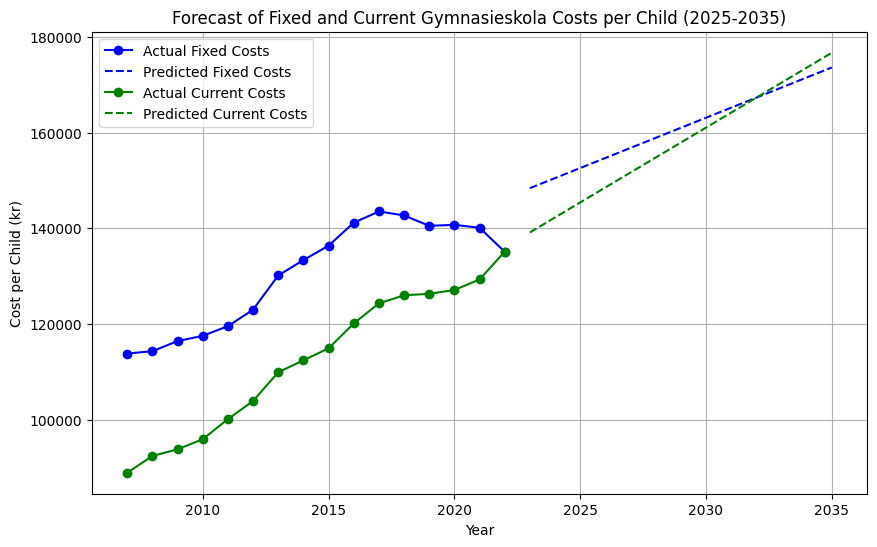

In [497]:
# Visualization of forecasts
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], fixed_costs, label='Actual Fixed Costs', marker='o', color='blue')
plt.plot(future_years, fixed_costs_pred, label='Predicted Fixed Costs', linestyle='--', color='blue')
plt.plot(data['Year'], variable_costs, label='Actual Current Costs', marker='o', color='green')
plt.plot(future_years, variable_costs_pred, label='Predicted Current Costs', linestyle='--', color='green')
plt.xlabel('Year')
plt.ylabel('Cost per Child (kr)')
plt.title('Forecast of Fixed and Current Gymnasieskola Costs per Child (2025-2035)')
plt.legend()
plt.grid(True)
plt.show()

In [498]:
#Rounding of forecasts
forecast_df['Predicted_Fixed_Cost_per_child_kr'] = forecast_df['Predicted_Fixed_Cost_per_child_kr'].round().astype(int)
forecast_df['Predicted_Current_Cost_per_child_kr'] = forecast_df['Predicted_Current_Cost_per_child_kr'].round().astype(int)


In [499]:
# Saving table to CSV file
csv_file_path = 'gymnasieskola_costs_forecast.csv'
forecast_df.to_csv(csv_file_path, index=False)

In [500]:
# Saving the table to the SQLite database
conn = sqlite3.connect('education_costs_db.sqlite')
forecast_df.to_sql('gymnasieskola_costs_forecast', conn, if_exists='replace', index=False)

13

In [501]:

conn.close()

# 8. Calculation of the cost of education for regions in 2025-2035

In [502]:
# Connect to the database
conn = sqlite3.connect('education_costs_db.sqlite')

In [503]:
# Loading data from tables
school_data = pd.read_sql_query("SELECT * FROM school_gymnasium_results", conn)
grundskola_costs = pd.read_sql_query("SELECT * FROM grundskola_costs_forecast", conn)
gymnasieskola_costs = pd.read_sql_query("SELECT * FROM gymnasieskola_costs_forecast", conn)


In [504]:
# Defining the region and year for calculation
regions = [1, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 17, 18, 19, 20, 21, 22, 23, 24, 25]
years = list(range(2025, 2036))


In [505]:
# Preparing data for grundskola
cost_grundskola = []
for region in regions:
    for year in years:
        # Filter data by region and year
        school_row = school_data[(school_data['Region'] == region) & (school_data['year'] == year)]
        cost_row = grundskola_costs[grundskola_costs['Year'] == year]
        
        if not school_row.empty and not cost_row.empty:
            # Number of children
            total_children = school_row[['F_school', '1_school', '2_school', '3_school', '4_school', 
                                         '5_school', '6_school', '7_school', '8_school', '9_school']].sum(axis=1).values[0]
            # Cost per child
            fixed_cost = total_children * cost_row['Predicted_Fixed_Cost_per_child_kr'].values[0]
            current_cost = total_children * cost_row['Predicted_Current_Cost_per_child_kr'].values[0]
            
            # Saving the result
            cost_grundskola.append({
                'Region': region,
                'Year': year,
                'Predicted_Fixed_Cost': round(fixed_cost),
                'Predicted_Current_Cost': round(current_cost)
            })


In [506]:
# Convert results to DataFrame
cost_grundskola_df = pd.DataFrame(cost_grundskola)


In [507]:
# Save results to CSV file
cost_grundskola_df.to_csv('Cost_region_grundskola_forecast_2025_2035.csv', index=False)

In [508]:
# Saving the table to the database
cost_grundskola_df.to_sql('Cost_region_grundskola_forecast_2025_2035', conn, if_exists='replace', index=False)

231

In [509]:
# Preparing data for gymnasieskola
cost_gymnasieskola = []
for region in regions:
    for year in years:
        # Filter data by region and year
        school_row = school_data[(school_data['Region'] == region) & (school_data['year'] == year)]
        cost_row = gymnasieskola_costs[gymnasieskola_costs['Year'] == year]
        
        if not school_row.empty and not cost_row.empty:
            # Number of children in the gymnasium
            total_children = school_row[['1_gymnasium', '2_gymnasium', '3__gymnasium']].sum(axis=1).values[0]
           # Cost per child
            fixed_cost = total_children * cost_row['Predicted_Fixed_Cost_per_child_kr'].values[0]
            current_cost = total_children * cost_row['Predicted_Current_Cost_per_child_kr'].values[0]
            
            # Saving the result
            cost_gymnasieskola.append({
                'Region': region,
                'Year': year,
                'Predicted_Fixed_Cost': round(fixed_cost),
                'Predicted_Current_Cost': round(current_cost)
            })


In [510]:
# Convert results to DataFrame
cost_gymnasieskola_df = pd.DataFrame(cost_gymnasieskola)

In [511]:
# Save results to CSV file
cost_gymnasieskola_df.to_csv('Cost_region_gymnasieskola_forecast_2025_2035.csv', index=False)

In [512]:
# Saving the table to the database
cost_gymnasieskola_df.to_sql('Cost_region_gymnasieskola_forecast_2025_2035', conn, if_exists='replace', index=False)


231

In [513]:
# Closing the connection
conn.close()